# Exercise 7: K-means clustering and Principal Component Analysis

In this exercise, you will implement the K-means clustering algorithm and
apply it to compress an image. In the second part, you will use principal
component analysis to find a low-dimensional representation of face images.

In [156]:
# libraries
# data handling
import pandas as pd
import numpy as np
import sklearn as sk

# fit parameters
import scipy as sp
import scipy.io as sio

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## K-means Clustering

In this this exercise, you will implement the K-means algorithm and use it
for image compression. You will first start on an example 2D dataset that
will help you gain an intuition of how the K-means algorithm works. After
that, you wil use the K-means algorithm for image compression by reducing
the number of colors that occur in an image to only those that are most
common in that image.

### Implementing K-means

The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning
examples to their closest centroids and then recomputing the centroids based
on the assignments.

```Octave
% Initialize centroids
centroids = kMeansInitCentroids(X, K);
for iter = 1:iterations
    % Cluster assignment step: Assign each data point to the
    % closest centroid. idx(i) corresponds to cˆ(i), the index
    % of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids);
    
    % Move centroid step: Compute means based on centroid
    % assignments
    centroids = computeMeans(X, idx, K);
end
```

The loop assignes each training example to its closes centroid and recomputes the mean of each centroid using the points assigned to it. The K-means
algorithm will always converge to some final set of means for the centroids.
Note that the converged solution may not always be ideal and depends on the
initial setting of the centroids. Therefore, in practice the K-means algorithm
is usually run a few times with different random initializations. One way to
choose between these different solutions from different random initializations
is to choose the one with the lowest cost function value (distortion).

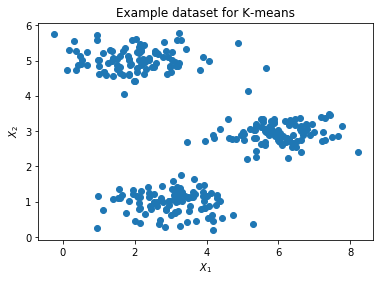

In [157]:
# import data
dat = sio.loadmat('ex7/ex7data2.mat')
X1 = np.array(dat['X'],dtype='float')

# visualize
plt.scatter(X1[:,0],X1[:,1])
plt.title('Example dataset for K-means')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

#### Finding the closest centroids

Your task is to complete the code in findClosestCentroids.m. This
function takes the data matrix X and the locations of all centroids inside
centroids and should output a one-dimensional array idx that holds the
index (a value in {1, ..., K}, where K is total number of centroids) of the
closest centroid to every training example.


In [158]:
def findClosestCentroids(x, centroids):
    """
    Returns vector of K classes that corresponds to the number of centroids
    """
    # compute euclidean distance of each point with k centroids, and get closest index
    get_centroid_cluster = lambda point: np.sqrt(
        np.sum((centroids - point) ** 2, axis=1)
    ).argmin()
    
    get_centroid_dist = lambda point: np.sqrt(
        np.sum((centroids - point) ** 2, axis=1)
    ).min()
    
    # apply over x
    return np.apply_along_axis(get_centroid_cluster, axis=1, arr=x),np.apply_along_axis(get_centroid_dist, axis=1, arr=x)

#### Computing centroid means

Create function that computes the means of each cluster to update the centroids.

In [159]:
def computeCentroids(x,cluster,K,centroid):
    """
    Returns new centroids averaged from assigned clusters.
    """
    # init centroid
    new_centroid = centroid
    
    # compute mean for each cluster
    for cl in range(K):
        # subset
        tmp_subset = x[cluster == cl]

        if len(tmp_subset) > 0:
            # update centroid
            new_centroid[cl,:] = np.mean(tmp_subset,axis=0)
        else:
            print("Cluster", cl, "centroid was not assigned to any data point.")
            next

    return new_centroid        

In [160]:
def init_rnd_centroids(x, K):
    # init random centroids based on input data
    idx = np.random.randint(0, len(x), size=K)
    centroids = x[idx,:]
    return centroids

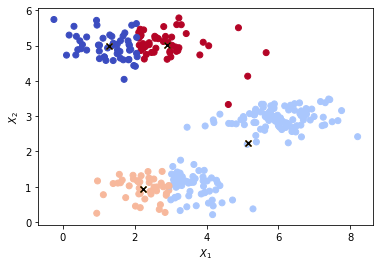

In [161]:
# example

K = 4

# init centroids
centroids = init_rnd_centroids(X1,K)

# define clusters
cluster,costs = findClosestCentroids(X1, centroids)

# new_centroids
new_centroids = computeCentroids(x,cluster,K,centroids)

# visualize
plt.scatter(x=X1[:, 0].flatten(), y=X1[:, 1].flatten(), c=cluster, cmap=plt.cm.coolwarm)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="orange")
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker="x", color="black")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.show()

### K-means on example dataset

In [162]:
def runKmeans(x,K,n_iterations,plot=False):
    """
    Runs K means for n_iterations and returns the final clusters and centroids. Set plot=True to see a 2D visualization
    """
    # initialize centroids
    centroids = init_rnd_centroids(x,K)
    
    for i in range(n_iterations):
        # assign K clusters based on centroids
        # define clusters
        cluster, costs = findClosestCentroids(x, centroids)

        # new_centroids
        centroids = computeCentroids(x,cluster,K,centroids)
        
        
    if plot==True:
        # visualize
        plt.scatter(x=X1[:, 0].flatten(), y=X1[:, 1].flatten(), c=cluster, cmap=plt.cm.coolwarm)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="orange")
        plt.xlabel(r"$X_1$")
        plt.ylabel(r"$X_2$")
        plt.show()
        
    return {'clusters':cluster,'centroids': centroids, 'cost': (1/len(x))*np.sum(costs)}

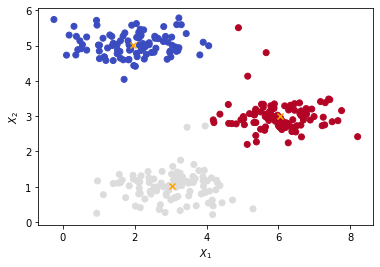

{'clusters': array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 

In [163]:
runKmeans(X1,3,10,plot=True)

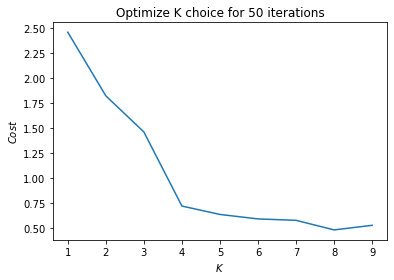

In [164]:
# optimize number of clusters according to cost
# init
n_clusters = np.arange(1,10)
d = X1
costs = np.ones(len(n_clusters))

# for each number of clusters save the final cost value
for i,k in enumerate(n_clusters):
    # compute Kmeans
    costs[i] = runKmeans(d,k,50)['cost']
    
# visualize
plt.plot(n_clusters,costs)
plt.title('Optimize K choice for 50 iterations')
plt.xlabel(r'$K$')
plt.ylabel(r'$Cost$')
plt.show()

The elbow appears at the 3rd iteration.

### Image compression with K-means

In a
6
straightforward 24-bit color representation of an image
each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify
the red, green and blue intensity values. This encoding is often refered to as
the RGB encoding. Our image contains thousands of colors, and in this part
of the exercise, you will reduce the number of colors to 16 colors.

By making this reduction, it is possible to represent (compress) the photo
in an efficient way. Specifically, you only need to store the RGB values of
the 16 selected colors, and for each pixel in the image you now need to only
store the index of the color at that location (where only 4 bits are necessary
to represent 16 possibilities).

In this exercise, you will use the K-means algorithm to select the 16 colors
that will be used to represent the compressed image. Concretely, you will
treat every pixel in the original image as a data example and use the K-means
algorithm to find the 16 colors that best group (cluster) the pixels in the 3-
dimensional RGB space. Once you have computed the cluster centroids on
the image, you will then use the 16 colors to replace the pixels in the original
image.

(128, 128, 3)


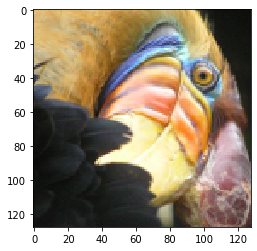

In [170]:
# import image
pic = np.array(sio.loadmat('ex7/bird_small.mat')['A'],dtype='int')

# some info
print(pic.shape)

# visualize
plt.imshow(pic)
plt.show()

Create a m x 3 matrix of pixel colors, and call `runKmeans` on it with K=16.

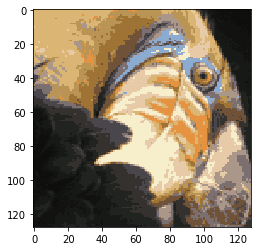

In [200]:
# reshape RGB pixels
m = pic.shape[0]*pic.shape[1]
x = pic.reshape(m,3)

# run Kmeans
out_kmeans = runKmeans(x,16,25)

# map pixels to centroids
# map clusters and centroids to reconstructued picture
pic_rec = out_kmeans['centroids'][out_kmeans['clusters'],:]
# visualize
plt.imshow(pic_rec.reshape(pic.shape))
plt.show()

## Principal Component Analysis

In this exercise, you will use principal component analysis (PCA) to perform
dimensionality reduction. You will first experiment with an example 2D
dataset to get intuition on how PCA works, and then use it on a bigger
dataset of 5000 face image dataset.

### Example Dataset

To help you understand how PCA works, you will first start with a 2D dataset
which has one direction of large variation and one of smaller variation. In this part of the
exercise, you will visualize what happens when you use PCA to reduce the
data from 2D to 1D. In practice, you might want to reduce data from 256 to
50 dimensions, say; but using lower dimensional data in this example allows
us to visualize the algorithms better.

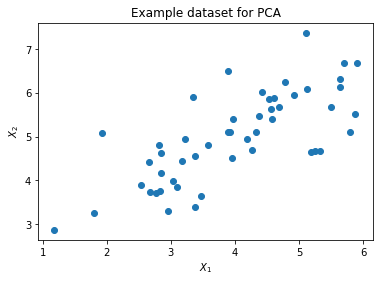

In [203]:
# example
dat = sio.loadmat('ex7/ex7data1.mat')
X2 = dat['X']

# visualize
plt.scatter(X2[:,0],X2[:,1])
plt.title('Example dataset for PCA')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

### Implementing PCA

First, we compute the covariance matrix of the data. Then, we use the `np.linalg.eig` function to compute the eigenvectors and eigenvalues of the data. Remember that the eigenvalues corresponds to the standard deviation of the corresponding principal component.

Before performing PCA we need to normalize and scale each feature.

In [208]:
def pca(x):
    """Returns Principal Components and eigenvalues"""
    # compute covariance
    covmat = (1 / len(x)) * x.T.dot(x)

    # compute eigenvalues and eigenvectors
    return np.linalg.eig(covmat)


def featureNormalize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [217]:
S, U = pca(featureNormalize(X2))
print(S)
print(U)

[1.73553038 0.26446962]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### Dimensionality Reduction with PCA


After computing the principal components, you can use them to reduce the
feature dimension of your dataset by projecting each example onto a lower
dimensional space, $x^{(i)} \rightarrow z^{(i)}$
(e.g., projecting the data from 2D to 1D). In
this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space.
In practice, if you were using a learning algorithm such as linear regression
or perhaps neural networks, you could now use the projected data instead
of the original data. By using the projected data, you can train your model
faster as there are less dimensions in the input.

#### Projecting the data onto the principal components

In [245]:
def projectData(x,U,K):
    """
    Returns projected data from "x" through the "K" desired dimensions in "U".
    """
    # get reduced U
    U_reduce = U[:,:K]
    
    # project
    return x.dot(U_reduce)

#### Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high
dimensional space. Your task is to complete `recoverData` to project each
example in Z back onto the original space and return the recovered approximation in X rec.
You should recover an approximation of the first example and you should see a value of
about [-1.047 -1.047]

In [265]:
def recoverData(x,U,K):
    """
    Reconstructs data "X_rec" from through dot product of "z" and "U_reduced"
    """
    # get reduced U
    U_reduce = U[:,:K]
    
    # project
    z = x.dot(U_reduce)
    
    return z.dot(U_reduce.T)

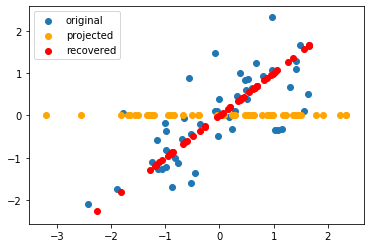

In [271]:
X_norm = featureNormalize(X2)
z = projectData(X_norm,U,1)
X_rec = recoverData(X_norm,U,1)

# visualize
plt.scatter(X_norm[:,0],X_norm[:,1])
plt.scatter(z,np.zeros(len(X2)),color='orange')
plt.scatter(X_rec[:,0],X_rec[:,1],color='red')
plt.legend(labels=['original','projected','recovered'])
plt.show()

### Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it
can be used in practice for dimension reduction. The dataset `ex7faces.mat`
contains a dataset3 X of face images, each 32 × 32 in grayscale. Each row
of X corresponds to one face image (a row vector of length 1024).

(5000, 1024)


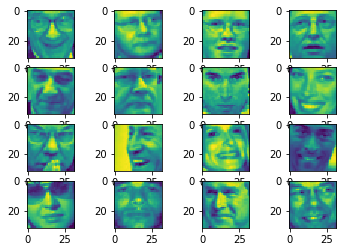

In [290]:
# load face dataset
dat = sio.loadmat("ex7/ex7faces.mat")
faces = dat["X"]

print(faces.shape)

# visualize
n_img = 16
for i in range(n_img):
    plt.subplot(4, 4, i + 1)
    plt.imshow(faces[i, :].reshape(32, 32).T)

plt.show()

#### PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by subtracting
the mean of each feature from the data matrix X. After running PCA, you will
obtain the principal components of the dataset. Notice that each principal
component in U (each row) is a vector of length n (where for the face dataset,
n = 1024). It turns out that we can visualize these principal components by
reshaping each of them into a 32 × 32 matrix that corresponds to the pixels
in the original dataset. The first 36 principal
components that describe the largest variations (Figure 8). If you want, you
can also change the code to display more principal components to see how
they capture more and more details.

In [316]:
U_faces.shape

(1024, 1024)

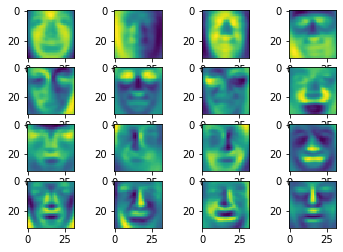

In [319]:
# normalize
faces_norm = featureNormalize(faces)

# perform PCA
S_faces, U_faces = pca(faces_norm)


# visualize PCs
n_img = 16
for i in range(n_img):
    plt.subplot(4, 4, i + 1)
    plt.imshow(U_faces[:, i].reshape(32, 32).T)

plt.show()

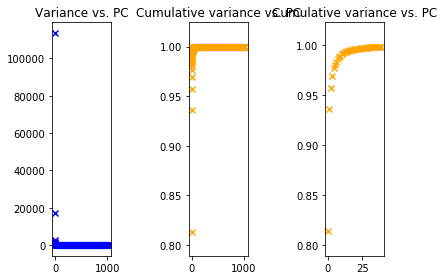

In [305]:
# visualize variance
var = S_faces ** 2
plt.subplot(1, 3, 1)
plt.scatter(range(len(var)), var, marker="x", color="blue")
plt.title("Variance vs. PC")
plt.subplot(1, 3, 2)
plt.scatter(range(len(var)), np.cumsum(var) / np.sum(var), marker="x", color="orange")
plt.title("Cumulative variance vs. PC")
plt.subplot(1, 3, 3)
plt.scatter(range(len(var))[:40], (np.cumsum(var) / np.sum(var) )[:40], marker="x", color="orange")
plt.title("Cumulative variance vs. PC")

plt.tight_layout()
plt.show()

#### Dimensionality Reduction

Now that you have computed the principal components for the face dataset,
you can use it to reduce the dimension of the face dataset. This allows you to
use your learning algorithm with a smaller input size (e.g., 100 dimensions)
instead of the original 1024 dimensions. This can help speed up your learning
algorithm.

Project the face dataset onto only the
first 100 principal components.

To understand what is lost in the dimension reduction, you can recover
the data using only the projected dataset.

In [314]:
z_faces = projectData(faces_norm,U_faces,36)
print(z_faces.shape)

(5000, 36)


(5000, 1024)


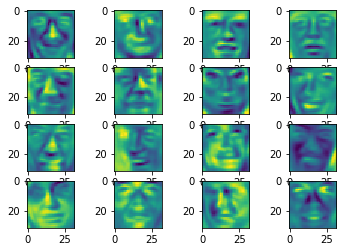

In [312]:
faces_rec = recoverData(faces_norm,U_faces,100)
print(faces_rec.shape)                        

# visualize
n_img = 16
for i in range(n_img):
    plt.subplot(4, 4, i + 1)
    plt.imshow(faces_rec[i, :].reshape(32, 32).T)

plt.show()

From the reconstruction, you can observe that the general structure and appearance of the face are kept while
the fine details are lost.

This is a very useful method to keep only important information and speed up a learning algorithm significantly.